In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [2]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [3]:
N = 20
w_in = 0.3e-9
bias = 5e-3

f = 0 # 50
a = 12e-3

r_e = 0
r_i = 0
ns_e, ts_e, vs = neurons.lif(t, N, k, 
                             ns, ts, 
                             w_in, bias, 
                             f, a=a, 
                             time_step=dt, 
                             r_e=r_e, r_i=r_i)

<synapses_2.w: array([ 0.03      ,  0.03293347,  0.02196343,  0.03640692,  0.02663026,
        0.01147926,  0.02425969,  0.08847059,  0.05611049,  0.06203354,
        0.05346815,  0.04474097,  0.        ,  0.02296949,  0.0353581 ,
        0.00698411,  0.07846829,  0.        ,  0.05576565,  0.1340392 ,
        0.03      ,  0.03314532,  0.03387952,  0.01555957,  0.03815714,
        0.04825323,  0.        ,  0.0417021 ,  0.01169583,  0.01969974,
        0.049681  ,  0.03831502,  0.        ,  0.07429489,  0.05787629,
        0.02878639,  0.        ,  0.04635756,  0.        ,  0.        ,
        0.03      ,  0.0298688 ,  0.03218849,  0.03220379,  0.01865837,
        0.04290746,  0.03417409,  0.0415693 ,  0.        ,  0.00192087,
        0.01995468,  0.07492525,  0.01268671,  0.02719041,  0.        ,
        0.07716969,  0.00112325,  0.        ,  0.1687303 ,  0.05499745,
        0.03      ,  0.03083733,  0.02096178,  0.02524305,  0.03371887,
        0.03103001,  0.01520722,  0.0019789 ,  0.

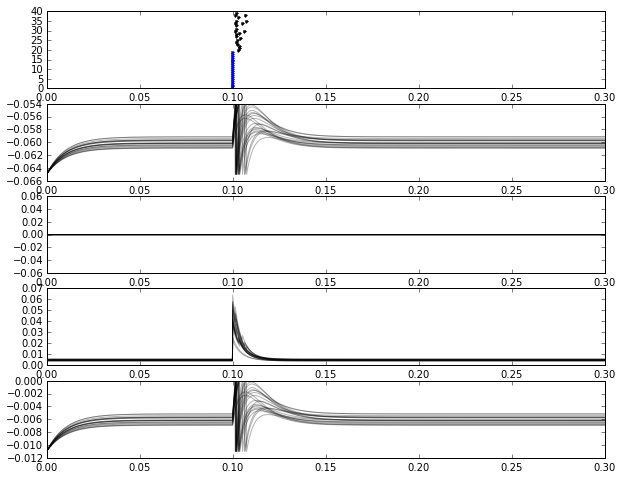

In [4]:
plt.figure(figsize=(10, 8))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
    
plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(0.0, color='k', alpha=0.5)

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3); 
plt.axhline(0.0, color='k', alpha=0.5)

In [5]:
# Now readout the 'E' response, in another LIF 

In [6]:
N = 100
w_in = .1e-9
bias = 100e-6

f = 0 # 50
a = 0

ns_out, ts_out, vs_out = neurons.lif(
    t, N, k, 
    ns_e, ts_e, 
    w_in, bias,
    sigma_scale=0,
    f=f, a=a, 
    time_step=dt)

<synapses_2.w: array([ 0.01      ,  0.00253218,  0.00890162, ...,  0.41921573,
        0.        ,  0.        ])>
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in 2s


(0.09, 0.15)

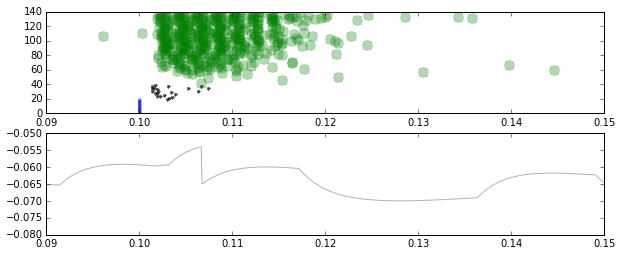

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + k + k + 1, '.g', alpha=0.3, markersize=20)
plt.xlim(0.09, .15)

plt.subplot(212)
for j in range(1):
    plt.plot(times, vs_out['vm'][j, :], 'k', alpha=0.3);
plt.xlim(0.09, .15)